In [3]:
#importing important libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [4]:
#data loading of CIFAR-10 which has 6000 images of airplanes, trucks, dogs, cars, birds, cats, frogs, deer, horses and ships each.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print('Size of the trained data {}'.format(x_train.shape))
print('Size of the test data {}'.format(x_test.shape))

Size of the trained data (50000, 32, 32, 3)
Size of the test data (10000, 32, 32, 3)


Here, We have 50000 images of data for training and 10000 images of data for testing.

In [6]:
print('Size of the train class{}'.format(y_train.shape))
print('Size of the test data {}'.format(y_test.shape))

Size of the train class(50000, 1)
Size of the test data (10000, 1)


In [7]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_class=len(np.unique(y_train))

In [8]:
print("Total Classes is {}".format(num_class))

Total Classes is 10


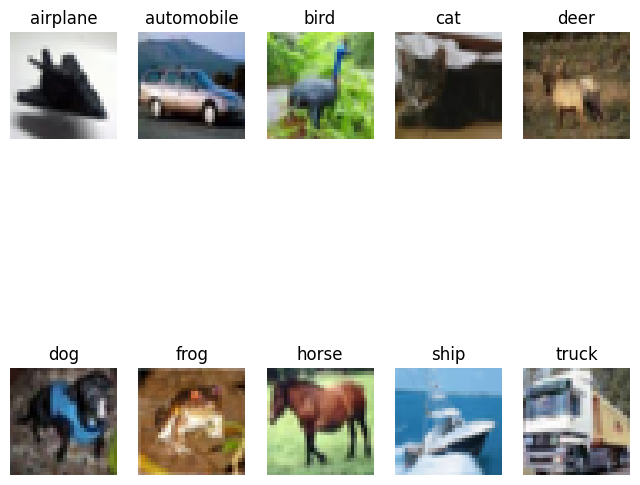

In [9]:
#to plot first image of all the classes of the taken dataset
plt.figure(figsize=(8,8))
for i in range(num_class):
  ax=plt.subplot(2,5,i+1)
  idx=np.where(y_train[:]==i)[0]
  features_idx = x_train[idx,::]
  plt.imshow(features_idx[0])
  ax.set_title(class_names[i])
  plt.axis("off")

In [10]:
#to convert integor datatype to float and divide it by 255 to nomalize the images
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255.0
x_test/=255.0

In [11]:
#one hot encode outputs
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

CREATING THE MODEL

In [14]:
model = Sequential ([
    layers.Conv2D(32,(3,3),input_shape=x_train.shape[1:], padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

COMPILING THE MODEL


In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

TRAINING THE MODEL

In [16]:
seed=21
np.random.seed(seed)
epochs=10
batch_size=32
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=epochs, batch_size=batch_size)

Epoch 1/10
1563/1563 [==============================] - 139s 87ms/step - loss: 1.4407 - accuracy: 0.4755 - val_loss: 1.1389 - val_accuracy: 0.5957
Epoch 2/10
1563/1563 [==============================] - 138s 89ms/step - loss: 1.0690 - accuracy: 0.6218 - val_loss: 0.9940 - val_accuracy: 0.6523
Epoch 3/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.9087 - accuracy: 0.6801 - val_loss: 0.9043 - val_accuracy: 0.6868
Epoch 4/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.8059 - accuracy: 0.7159 - val_loss: 0.8578 - val_accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7221 - accuracy: 0.7472 - val_loss: 0.8315 - val_accuracy: 0.7095
Epoch 6/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.6570 - accuracy: 0.7693 - val_loss: 0.7720 - val_accuracy: 0.7356
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6067 - accuracy: 0.7856 - val_loss: 0

VISUALIZING OF RESULTS


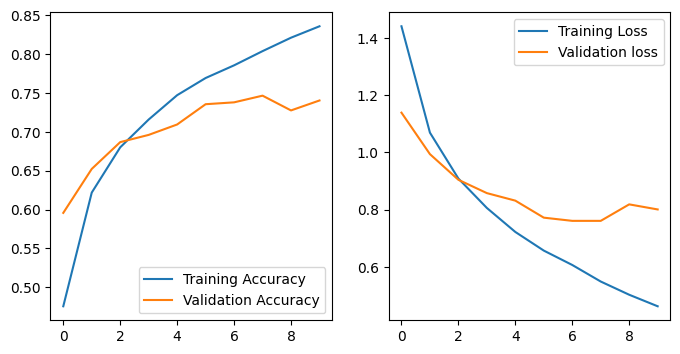

In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title=("Accuracy of Trained and Validatation Data")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title=("Training and Validation Loss")
plt.show()